In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")

In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#Goal: Explore how survival predictions differ when you train models for different age brackets separately.
    #Steps
            #Create Age Groups
            #Define three categories:
            #Child: Age < 18
            #Adult: Age 18–50
            #Senior: Age > 50
    #Subset Data & Train Models
            #For each age group, train a model (Logistic Regression is fine) to predict survival.
            #Compare accuracy, precision, recall for each group.
            #Compare with Overall Model
            #Train one model on the entire dataset.
    #Compare performance metrics with age-specific models.
            #Visualize Results
            #Bar chart: Age group vs accuracy (and maybe precision/recall).

In [5]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Senior'

data['AgeGroup'] = data['Age'].apply(categorize_age)

In [6]:
new_data = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","AgeGroup","Survived"]].copy()

In [7]:
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Survived
0,3,male,22.0,1,0,7.2500,S,Adult,0
1,1,female,38.0,1,0,71.2833,C,Adult,1
2,3,female,26.0,0,0,7.9250,S,Adult,1


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
for col in ["Sex","Embarked","AgeGroup"]:
    new_data[col] = LabelEncoder().fit_transform(new_data[col])

In [15]:
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Survived
0,3,1,22.0,1,0,7.2500,2,0,0
1,1,0,38.0,1,0,71.2833,0,0,1
2,3,0,26.0,0,0,7.9250,2,0,1


In [16]:
x = new_data.iloc[:,:-1]
y = new_data["Survived"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [12]:
new_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
AgeGroup    0
Survived    0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
si = SimpleImputer(strategy = "mean")
new_data["Age"] = si.fit_transform(new_data[["Age"]])

In [11]:
new_data["Embarked"] = new_data["Embarked"].fillna(new_data["Embarked"].mode()[0])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [32]:
new_data["AgeGroup"].unique()

array([0, 2, 1])

In [33]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
results = []

for group in new_data['AgeGroup'].unique():
    subset = new_data[new_data['AgeGroup'] == group]
    
    X = subset.drop(columns=['Survived'])
    y = subset['Survived']

    y_pred = lr.predict(x_test)

    results.append({
        'AgeGroup': group,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    })

age_results_df = pd.DataFrame(results)

agegroup_mapping = {0: 'Child', 1: 'Adult', 2: 'Senior'}
age_results_df['AgeGroup'] = age_results_df['AgeGroup'].map(agegroup_mapping)

age_results_df

,AgeGroup,Accuracy,Precision,Recall
0,Child,0.810056,0.785714,0.743243
1,Senior,0.810056,0.785714,0.743243
2,Adult,0.810056,0.785714,0.743243


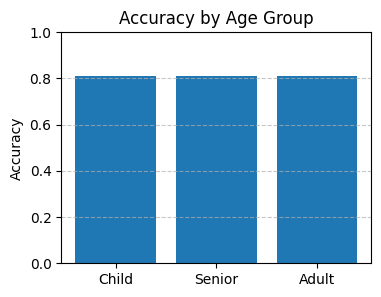

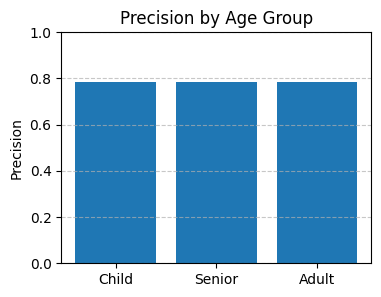

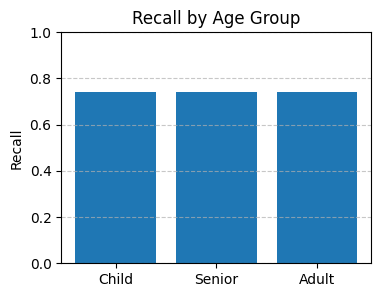

In [42]:
metrics = ['Accuracy', 'Precision', 'Recall']

for metric in metrics:
    plt.figure(figsize=(4,3))
    plt.bar(age_results_df['AgeGroup'], age_results_df[metric])
    plt.title(f'{metric} by Age Group')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()